In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from data_generation.problem_generator import ProblemData, generate_random_data, generate_simple_data
from visualizations.solution_visualization import prepare_data_for_gantt_chart, plot_gantt_chart, plot_robot_trajectories
from visualizations.problem_instance_visualization import show_problem_instance, plot_task_map 
from aswale_23.greedy_solver import greedy_scheduling
from aswale_23.MILP_solver import milp_scheduling

In [155]:
n_tasks = 5
n_robots = 2
n_skills = 3
# np.random.seed(35)

precedence_constraints = np.array([[1,2]])

robots = range(n_robots)
skills = range(n_skills)
tasks = range(n_tasks + 2) # Add start and end task

In [ ]:
%autoreload 2
problem_instance: ProblemData = generate_random_data(n_tasks, n_robots, n_skills, precedence_constraints)
show_problem_instance(problem_instance)



In [ ]:
%autoreload 2
plot_task_map(problem_instance['task_locations'], problem_instance['T_e'], problem_instance['R'])


### Greedy algorithm



Greedy time to completion: 949.1784761045869
Schedule:
  Number of tasks: 5
  Number of robots: 2
  Makespan/Arrival at end location: 949.18
  Robot Tasks:
    Robot 0:
      Task 5: 99.30 -> 261.30
      Task 3: 301.26 -> 493.26
      Task 1: 565.13 -> 689.13
      Task 2: 772.61 -> 814.61
      Task 4: 836.98 -> 894.98
    Robot 1:



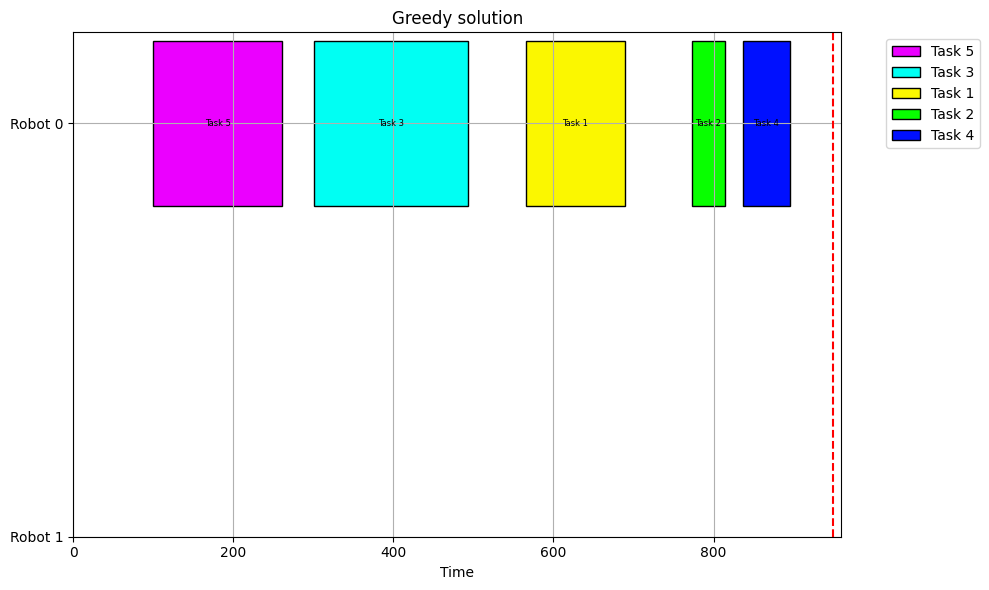

In [ ]:
greedy_schedule = greedy_scheduling(problem_instance)
print(greedy_schedule)
plot_gantt_chart("Greedy solution", greedy_schedule)

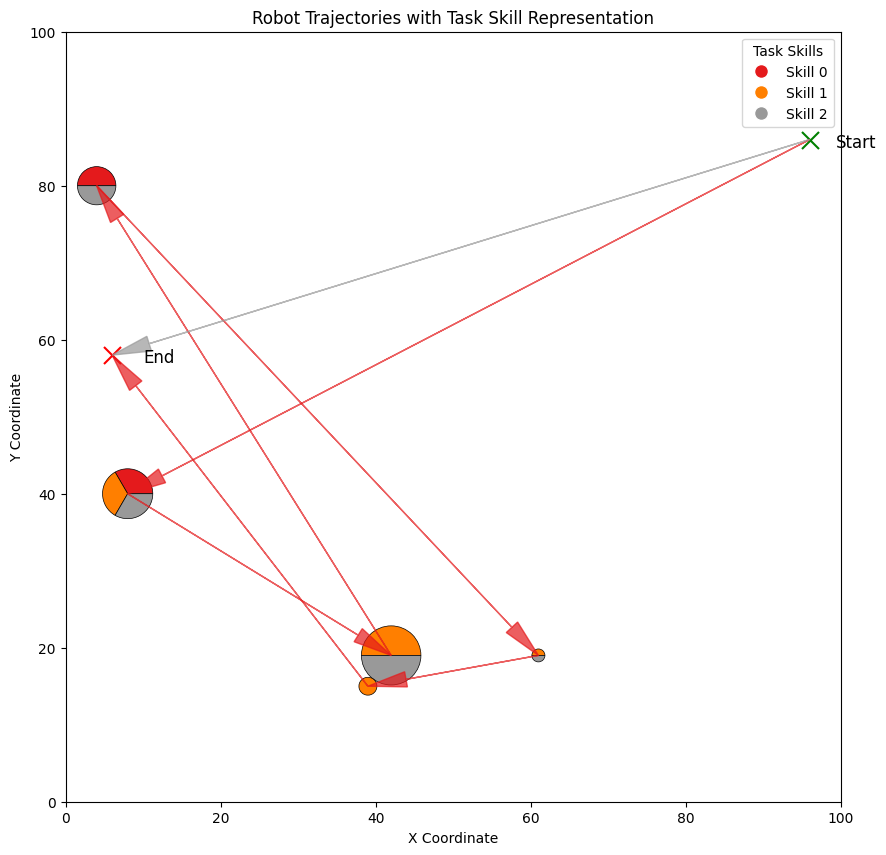

In [174]:
%autoreload
plot_robot_trajectories(problem_instance['task_locations'], greedy_schedule.robot_schedules, problem_instance['T_e'], problem_instance['R'])

### MILP Solver

In [169]:
%autoreload 2

milp_schedule = milp_scheduling(problem_instance)
print(milp_schedule)

Status: Optimal
MILP time to complete all tasks: 835.61736
Schedule:
  Number of tasks: 5
  Number of robots: 2
  Makespan/Arrival at end location: 835.62
  Robot Tasks:
    Robot 0:
      Task 1: 92.20 -> 216.20
      Task 2: 299.68 -> 341.68
      Task 3: 360.68 -> 552.68
      Task 4: 557.68 -> 615.68
      Task 5: 655.51 -> 817.51
    Robot 1:



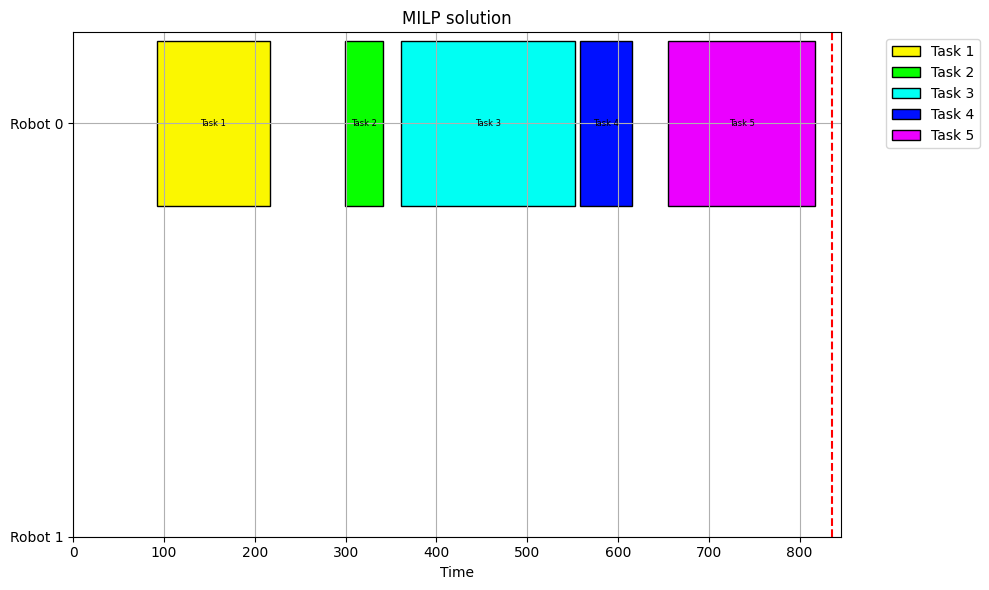

In [170]:
%autoreload 2
plot_gantt_chart("MILP solution", milp_schedule)


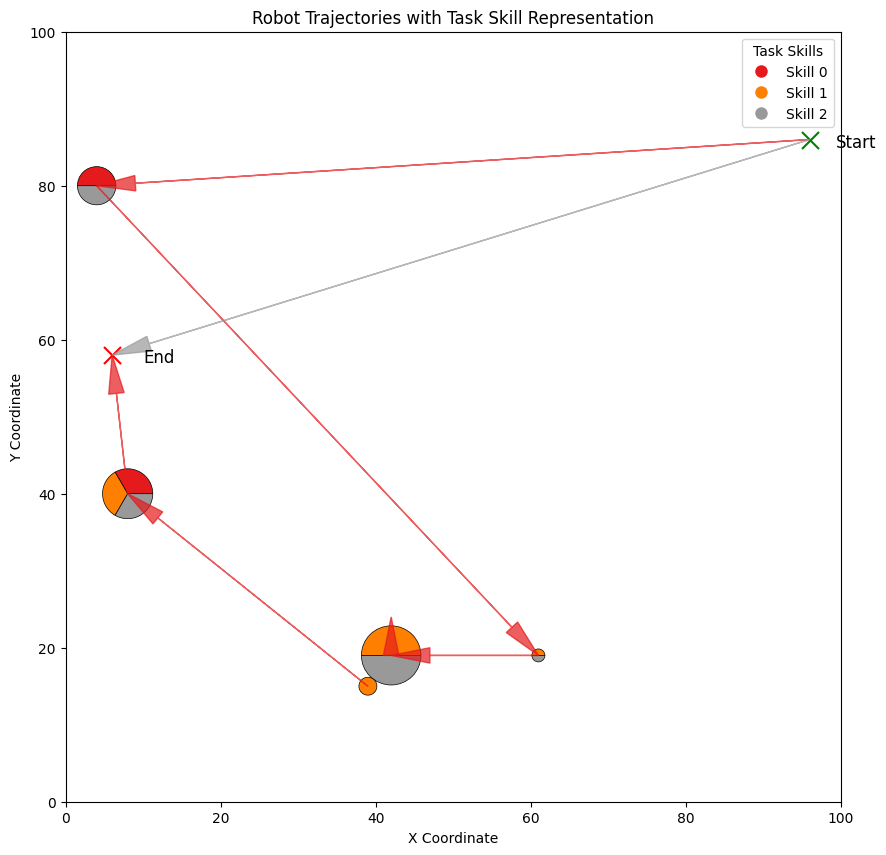

In [172]:
plot_robot_trajectories(problem_instance['task_locations'], milp_schedule.robot_schedules, problem_instance['T_e'], problem_instance['R'])

In [ ]:

%autoreload
import time

greedy_makespan = []
milp_makespan = []
greedy_times = []
milp_times = []

n_tasks = 8
n_robots = 2
n_skills = 3  
n_iterations = 20
precedence_constraints = np.array([[1,2], [3,1]])

for iteration in tqdm(range(n_iterations)):
    problem_instance: ProblemData = generate_random_data(n_tasks, n_robots, n_skills, precedence_constraints)

    # Track time for the greedy algorithm
    start_time = time.time()
    makespan, robot_task_assignments, task_start_times = greedy_scheduling(problem_instance)
    greedy_makespan.append(makespan)
    greedy_times.append(time.time() - start_time)  

    # Track time for the MILP algorithm
    start_time = time.time()
    makespan, tasks_to_plot, task_colors = milp_scheduling(problem_instance)
    milp_makespan.append(makespan)
    milp_times.append(time.time() - start_time)  

# Boxplot for Makespan comparison
plt.figure(figsize=(10, 6))
plt.boxplot([greedy_makespan, milp_makespan], labels=['Greedy Makespan', 'MILP Makespan'])
plt.ylabel('Makespan')
plt.title(f'Makespan Comparison for {n_robots}R, {n_tasks}T, {n_skills}S, {precedence_constraints.shape[0]}C over {n_iterations} Runs')
plt.show()

# Boxplot for Computational Time comparison
plt.figure(figsize=(10, 6))
plt.boxplot([greedy_times, milp_times], labels=['Greedy Computational Time', 'MILP Computational Time'])
plt.ylabel('Time (seconds)')
plt.title(f'Computational Time Comparison for {n_robots}R, {n_tasks}T, {n_skills}S, {precedence_constraints.shape[0]}C over {n_iterations} Runs')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Boxplot for Makespan comparison
plt.figure(figsize=(10, 6))
box_makespan = plt.boxplot([greedy_makespan, milp_makespan], labels=['Greedy Makespan', 'MILP Makespan'], patch_artist=True)
plt.ylabel('Makespan')
plt.title(f'Makespan Comparison for {n_robots}R, {n_tasks}T, {n_skills}S, {precedence_constraints.shape[0]}C over {n_iterations} Runs')

# Annotate medians
for i, line in enumerate(box_makespan['medians']):
    median = np.median([greedy_makespan, milp_makespan][i])
    x, y = line.get_xdata().mean(), line.get_ydata().mean()
    plt.text(x, y, f'{median:.0f}', ha='center', va='bottom', fontsize=12)

plt.show()

# Boxplot for Computational Time comparison
plt.figure(figsize=(10, 6))
box_times = plt.boxplot([greedy_times, milp_times], labels=['Greedy Computational Time', 'MILP Computational Time'], patch_artist=True)
plt.ylabel('Time (seconds)')
plt.title(f'Computational Time Comparison for {n_robots}R, {n_tasks}T, {n_skills}S, {precedence_constraints.shape[0]}C over {n_iterations} Runs')

# Annotate medians
for i, line in enumerate(box_times['medians']):
    median = np.median([greedy_times, milp_times][i])
    x, y = line.get_xdata().mean() + 0.15 , line.get_ydata().mean()
    plt.text(x, y, f'{median:.3f}', ha='center', va='bottom', fontsize=12)

plt.show()


In [ ]:
robot_schedules = {robot: {} for robot in robots}
robot_schedules

In [ ]:
color_pool = plt.cm.get_cmap('hsv', 5)

color_pool(0)
